In [ ]:
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# df = pd.read_csv('drive/MyDrive/Colab Notebooks/datasets/TweetsCOV19.tsv', delimiter="\t", error_bad_lines=False, names=["tweetId", "username", "timestamp", "followers_count", "friends_count", "retweets_count", "likes_count", "entities", "sentiment", "mentions", "hashtags", "urls"])

df = pd.read_csv("drive/MyDrive/Colab Notebooks/datasets/covid19_tweets.csv")

df


user_name  ... is_retweet
0                       ᏉᎥ☻լꂅϮ  ...      False
1                Tom Basile 🇺🇸  ...      False
2              Time4fisticuffs  ...      False
3                  ethel mertz  ...      False
4                     DIPR-J&K  ...      False
...                        ...  ...        ...
179103  AJIMATI AbdulRahman O.  ...      False
179104                   Jason  ...      False
179105             BEEHEMOTH ⏳  ...      False
179106           Gary DelPonte  ...      False
179107                 TUKY II  ...      False

[179108 rows x 13 columns]

In [ ]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [ ]:
df.sort_values(by="user_followers", ascending=False, inplace=True, ignore_index=True)

In [ ]:
df["mentions"] = df["text"].apply(lambda x: re.findall(r'\B@\w*[a-zA-Z]+\w*', x))
df['weight'] = df['user_followers']/df['user_friends']

In [ ]:
# count amount of tweets by location 
df.user_location.value_counts()
# df['user_location'].count(), df['user_location'].isna().sum()

India                            3741
United States                    2455
New Delhi, India                 1721
Mumbai, India                    1401
Washington, DC                   1354
                                 ... 
Somewhere on the Planet             1
Boston, MA USA                      1
1031 Goodworth Dr. Apex, NC         1
Brussels Nicosia Paris Vienna       1
Deepest Sussex!                     1
Name: user_location, Length: 26920, dtype: int64

In [ ]:
# data is mostly from july-august 2020

df.date = pd.to_datetime(df.date)
df.date = df.date.apply(lambda x: x.strftime('%B-%Y')) 

dateValueCounts = df.date.value_counts()
dateValueCounts.sort_index()

August-2020    127172
July-2020       51936
Name: date, dtype: int64

In [ ]:
df = df[(df['mentions'].str.len() != 0)]

df = df[(df['user_followers'] >= 5000)]
df = df[(df['user_favourites'] >= 5000)]


In [ ]:
G = nx.DiGraph()
for _, data in df.iterrows():
  user = data.user_name # source
  mentions = data.mentions # neighbours

  if user not in G.nodes():
    G.add_node(user)

  for neighbour in mentions:
    if neighbour not in G.nodes():
      G.add_node(neighbour)
    G.add_edge(user, neighbour, weight=data.user_favourites)

nx.write_gexf(G, "test.gexf")

print(len(G.nodes()))

8884


KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127897 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127897 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26519 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 34892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26519 missing from current font.
  font.set_

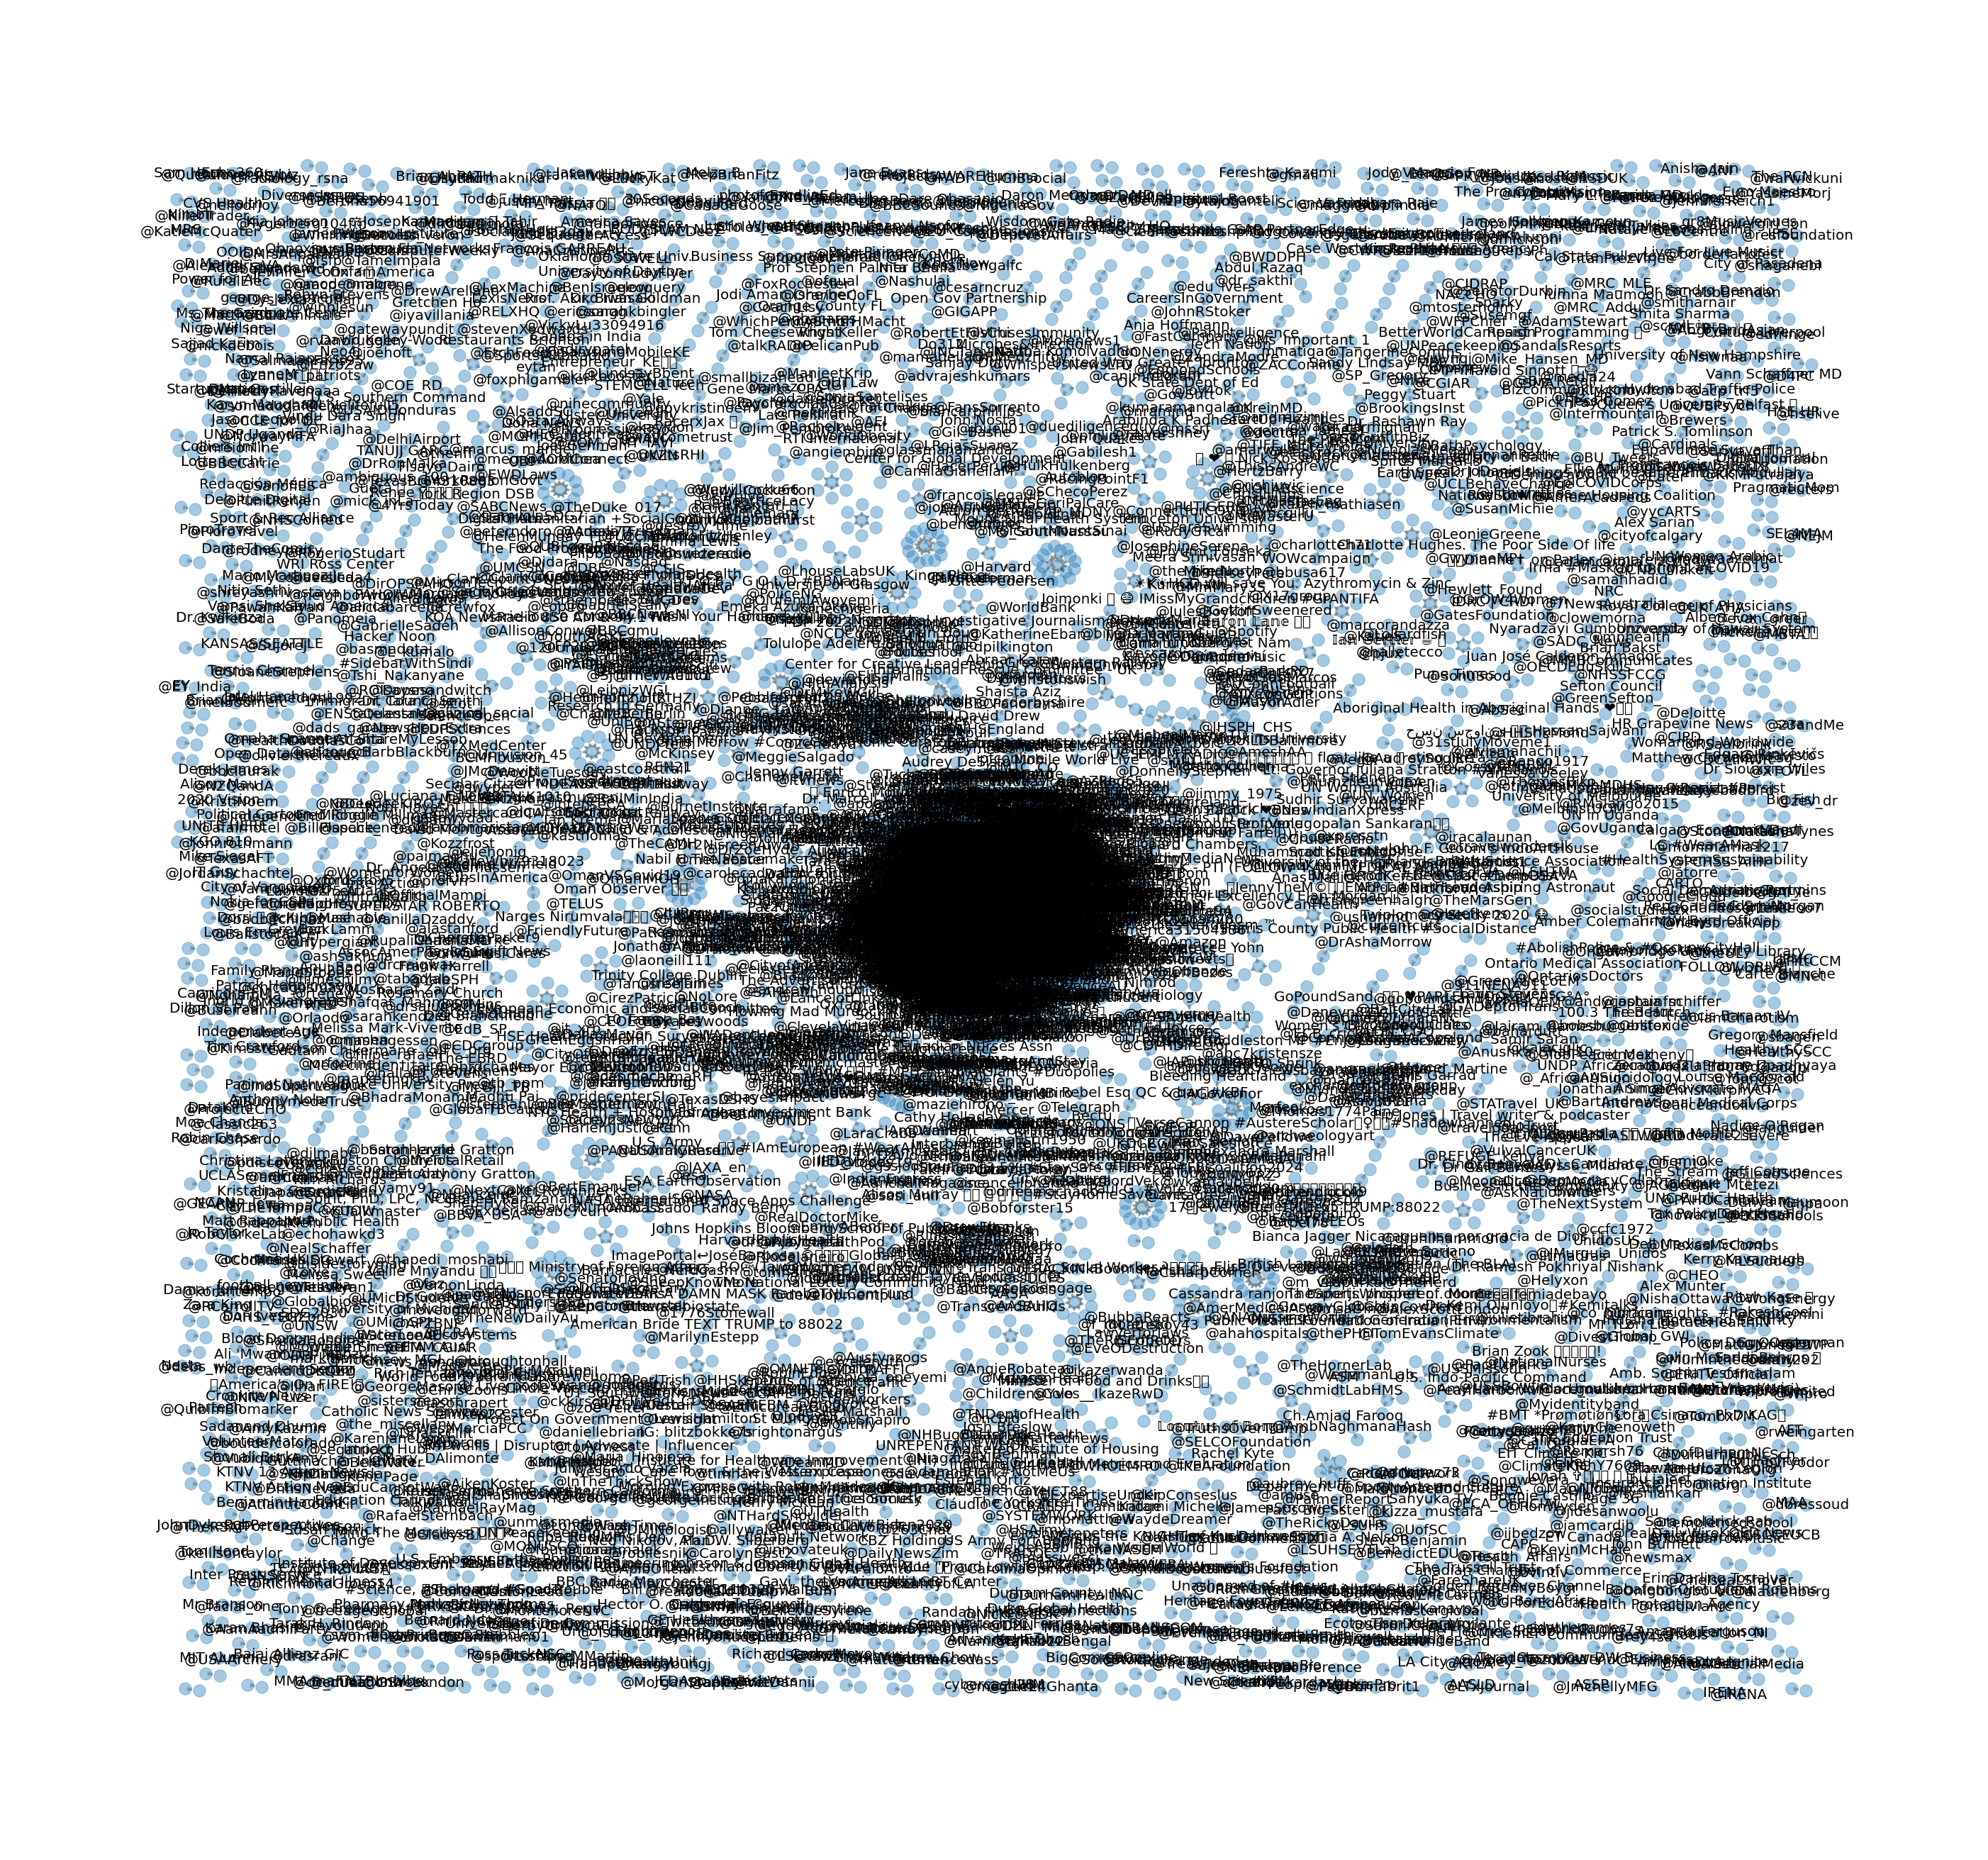

In [ ]:
a4_dims = (50, 48)
fig, ax = plt.subplots(figsize=a4_dims)
ax.set_axis_off()

pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx_nodes(G, pos, alpha=0.4)
nx.draw_networkx_edges(G, pos, alpha=0.2,width=3)
nx.draw_networkx_labels(G, pos, font_size=20)

plt.show()

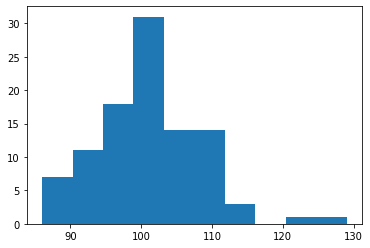

In [ ]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

plot_degree_dist(nx.gnp_random_graph(100, 0.5, directed=True))

In [ ]:
nx.degree_centrality(G)

AttributeError: ignored